In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from util import get_normalized_data, y2indicator

import matplotlib.pyplot as plt

C:\Users\Denis\AppData\Local\conda\conda\envs\tensorflow_env_gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# get the data, same as Theano + Tensorflow examples
# no need to split now, the fit() function will do it
X, Y = get_normalized_data()

# get shapes
N, D = X.shape
K = len(set(Y))

# by default Keras wants one-hot encoded labels
# there's another cost function we can use
# where we can just pass in the integer labels directly
# just like Tensorflow / Theano
Y = y2indicator(Y)

Reading in and transforming data...


In [3]:
# the model will be a sequence of layers
model = Sequential()


# ANN with layers [784] -> [500] -> [300] -> [10]
model.add(Dense(units=500, input_dim=D))
model.add(Activation('relu'))
model.add(Dense(units=300)) # don't need to specify input_dim
model.add(Activation('relu'))
model.add(Dense(units=K))
model.add(Activation('softmax'))

In [4]:
# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [5]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X, Y, validation_split=0.33, epochs=15, batch_size=32)
print("Returned:", r)

Train on 28139 samples, validate on 13861 samples
Epoch 1/15
28139/28139 [==============================] - 8s 271us/step - loss: 0.2734 - acc: 0.9201 - val_loss: 0.2044 - val_acc: 0.9463
Epoch 2/15
28139/28139 [==============================] - 7s 235us/step - loss: 0.1208 - acc: 0.9659 - val_loss: 0.1647 - val_acc: 0.9570
Epoch 3/15
28139/28139 [==============================] - 6s 224us/step - loss: 0.0963 - acc: 0.9725 - val_loss: 0.1799 - val_acc: 0.9579
Epoch 4/15
28139/28139 [==============================] - 6s 222us/step - loss: 0.0769 - acc: 0.9786 - val_loss: 0.2027 - val_acc: 0.9542
Epoch 5/15
28139/28139 [==============================] - 6s 228us/step - loss: 0.0655 - acc: 0.9828 - val_loss: 0.1851 - val_acc: 0.9618
Epoch 6/15
28139/28139 [==============================] - 6s 229us/step - loss: 0.0571 - acc: 0.9855 - val_loss: 0.1823 - val_acc: 0.9639
Epoch 7/15
28139/28139 [==============================] - 7s 238us/step - loss: 0.0449 - acc: 0.9886 - val_loss: 0.2085 - 

In [6]:
# print the available keys
# should see: dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])
print(r.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


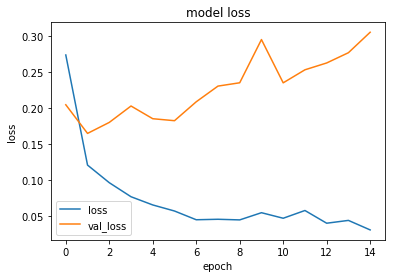

In [10]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

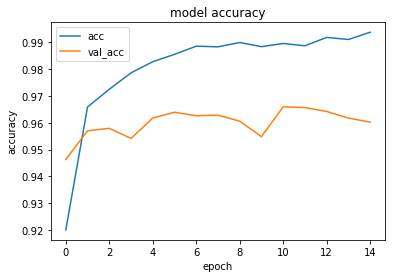

In [11]:
# accuracies
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()